In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [44]:
def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))

    print("Kernel Shape : {}".format(kernel.shape))

    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()

    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(image.shape)

    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)

    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))

    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    print("Output Image size : {}".format(output.shape))

    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()

    return output

In [45]:
def sobel_edge_detection(image, filter, verbose=False):
    new_image_x = convolution(image, filter, verbose)

    if verbose:
        plt.imshow(new_image_x, cmap='gray')
        plt.title("Horizontal Edge")
        plt.show()

    new_image_y = convolution(image, np.flip(filter.T, axis=0), verbose)

    if verbose:
        plt.imshow(new_image_y, cmap='gray')
        plt.title("Vertical Edge")
        plt.show()

    gradient_magnitude = np.sqrt(np.square(new_image_x) + np.square(new_image_y))

    gradient_magnitude *= 255.0 / gradient_magnitude.max()

    if verbose:
        plt.imshow(gradient_magnitude, cmap='gray')
        plt.title("Gradient Magnitude")
        plt.show()

    return gradient_magnitude

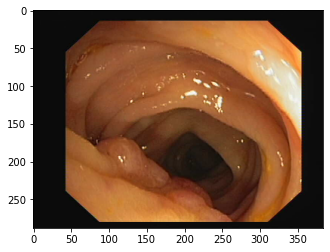

In [53]:
img_bgr = cv2.imread('./images/1.bmp')
img_hsv = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [47]:
filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

Found 3 Channels : (288, 384, 3)
Converted to Gray Channel. Size : (288, 384)
Kernel Shape : (3, 3)
Output Image size : (288, 384)


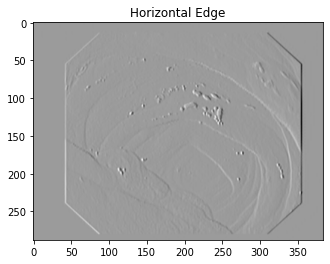

Found 3 Channels : (288, 384, 3)
Converted to Gray Channel. Size : (288, 384)
Kernel Shape : (3, 3)
Output Image size : (288, 384)


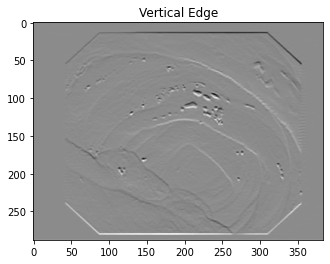

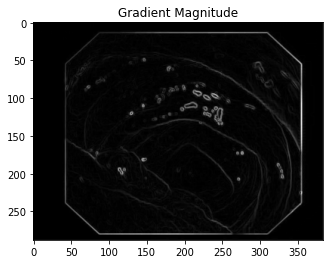

In [54]:
image = image[50:250, 50:350]
img_sobel = sobel_edge_detection(img_rgb, filter, verbose=True)

In [55]:
theta = 0.8
img_enhanced = img_rgb*theta + img_sobel*(1-theta)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(img_enhanced)

ValueError: operands could not be broadcast together with shapes (288,384,3) (288,384) 

In [51]:
img_enhanced

array([[ 57.73123015,  54.86399037,  55.76952786, ..., 179.85684322,
        189.36678602, 180.91888638],
       [ 54.14602764,  46.386307  ,  45.43631005, ..., 147.20020583,
        150.64608727, 190.28987534],
       [ 63.1547227 ,  45.66579127,  47.77772058, ..., 147.03622868,
        149.22441376, 188.35926278],
       ...,
       [  8.88665679,  27.2327437 ,  74.04252724, ...,  27.46246506,
         16.78842184,  16.84202682],
       [ 10.31561289,  11.19435518,  19.72737582, ...,  17.96284487,
         11.14338468,  13.37537822],
       [ 10.2203187 ,  10.62691288,  10.86827457, ...,  15.55130837,
         13.4037463 ,  14.08481208]])